In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_train_test = "Fruits_Vegetables/test"
data_train_val = "Fruits_Vegetables/validation"

In [3]:
img_width = 180
img_height = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False
)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_train_test,
    image_size = (img_height,img_width),
    batch_size=32,
    shuffle = False,
    validation_split = False
)

Found 359 files belonging to 36 classes.


In [8]:
data_val.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_train_val,
    image_size = (img_height,img_width),
    batch_size=32,
    shuffle = False,
    validation_split = False
)

Found 351 files belonging to 36 classes.


In [10]:
data_test.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

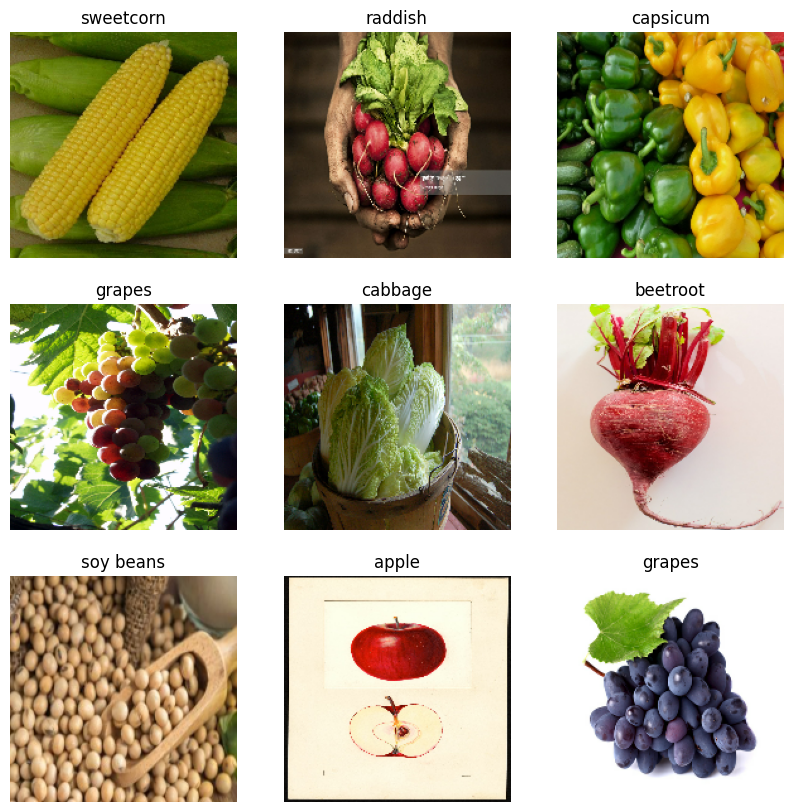

In [11]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,1+i)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [14]:
model = Sequential([
     layers.Rescaling(1./255),
     layers.Conv2D(16, 3, padding='same', activation='relu'),
     layers.MaxPooling2D(),
     layers.Conv2D(32, 3, padding='same', activation='relu'),
     layers.MaxPooling2D(),
     layers.Conv2D(64, 3, padding='same', activation='relu'),
     layers.MaxPooling2D(),
     layers.Flatten(),
     layers.Dropout(0.2),
     layers.Dense(128),
     layers.Dense(len(data_cat))
])

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
epochs_size = 25
history = model.fit(data_train,
                    validation_data=data_val,
                    epochs=epochs_size,
                    batch_size=32,
                    verbose = 1)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 420ms/step - accuracy: 0.0606 - loss: 3.9388 - val_accuracy: 0.2897 - val_loss: 2.3821
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 589ms/step - accuracy: 0.2810 - loss: 2.4874 - val_accuracy: 0.6546 - val_loss: 1.3812
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 281ms/step - accuracy: 0.4834 - loss: 1.7471 - val_accuracy: 0.8245 - val_loss: 0.7812
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 279ms/step - accuracy: 0.7024 - loss: 1.1103 - val_accuracy: 0.8774 - val_loss: 0.5197
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 274ms/step - accuracy: 0.8037 - loss: 0.6630 - val_accuracy: 0.9276 - val_loss: 0.4191
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 75s 764ms/step - accuracy: 0.8838 - loss: 0.4071 - val_accuracy: 0.9443 - val_loss: 0.3402
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 293ms/step - accuracy: 0.9210 - loss: 0.2973 - val_accuracy: 0.9499 - val_loss: 0.4137
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 333ms/step - accuracy: 0.9587 - loss: 0.2070 - val_accu

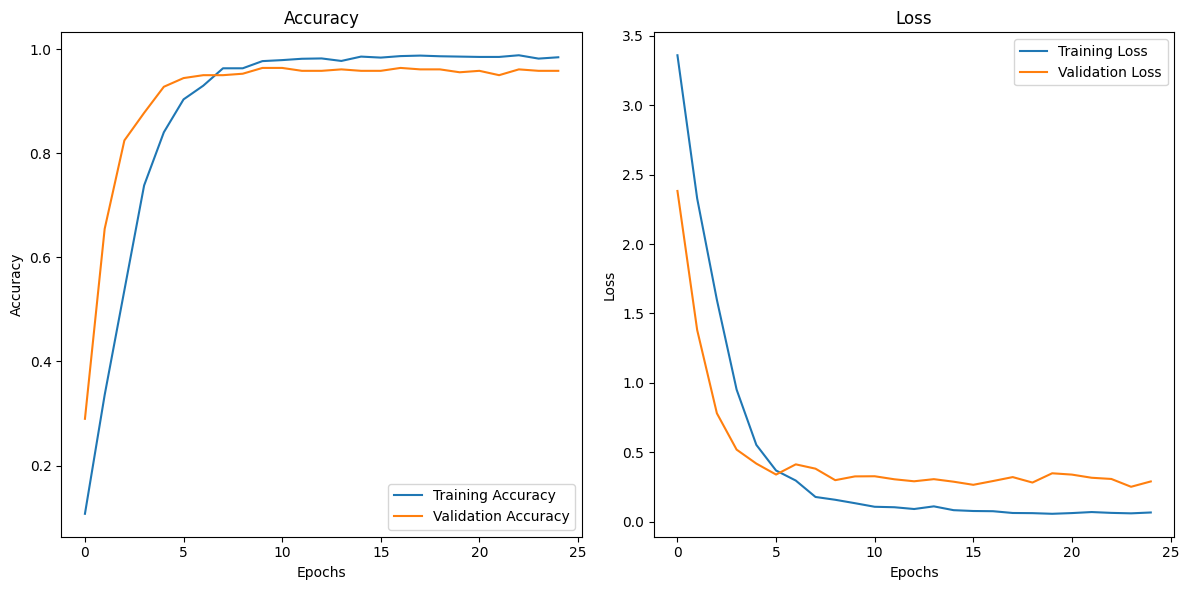

In [17]:
epochs_range = range(epochs_size)
plt.figure(figsize=(12, 6))  # Adjusting the figure size for better visibility

# Plotting Accuracy
plt.subplot(1, 2, 1)  # First subplot
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plotting Loss
plt.subplot(1, 2, 2)  # Second subplot
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


In [18]:
image = 'Apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [24]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [25]:
score = tf.nn.softmax(predict)

In [26]:
print('Veg/Fruit in image is {} with accuracy of {:.2f}'.format(data_cat[np.argmax(score)], np.max(score) * 100))


Veg/Fruit in image is apple with accuracy of 99.90


In [28]:
model.save('Image_classify.h5')